In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
import pandas as pd

df = pd.read_csv(r'/home/wallingson12/Github/Data science/análise-acidentes-transito/cat_acidentes.csv')

print(df.columns)

Index(['data_extracao;predial1;queda_arr;data;feridos;feridos_gr;mortes;morte_post;fatais;auto;taxi;lotacao;onibus_urb;onibus_met;onibus_int;caminhao;moto;carroca;bicicleta;outro;cont_vit;ups;patinete;idacidente;longitude;latitude;log1;log2;tipo_acid;dia_sem;hora;noite_dia;regiao;consorcio'], dtype='object')


# **Gráfico de calor**

> O gráfico de calor de forma pura pode não ser muito útil, como nesse exemplo que fica impossível de tirar alguma informação



In [39]:
import folium
from folium.plugins import HeatMap

# cria o mapa base
mapa = folium.Map(location=[-30.1, -51.15], zoom_start=11)

# remove linhas com latitude ou longitude nulas
df_filtrado = df.dropna(subset=['latitude', 'longitude'], how='any')

# gera lista de coordenadas válidas
coordenadas = list(zip(df_filtrado['latitude'], df_filtrado['longitude']))

# adiciona o HeatMap ao mapa
HeatMap(coordenadas, radius=9, blur=10).add_to(mapa)

# exibe o mapa
mapa

Output hidden; open in https://colab.research.google.com to view.

# **Gráfico cluster por região**

> Escolhi MarkerCluster para fazer um gráfico de cluster por região, demonstarndo o número de acidentes nas coordenadas informadas



In [40]:
from folium.plugins import MarkerCluster

mapa = folium.Map(location=[-30.1, -51.15], zoom_start=11)
mapa_cluster = MarkerCluster(coordenadas).add_to(mapa)
mapa

Output hidden; open in https://colab.research.google.com to view.

# **Número de acidentes por ano**

> Essa visualização demonstra o número de acidentes por ano





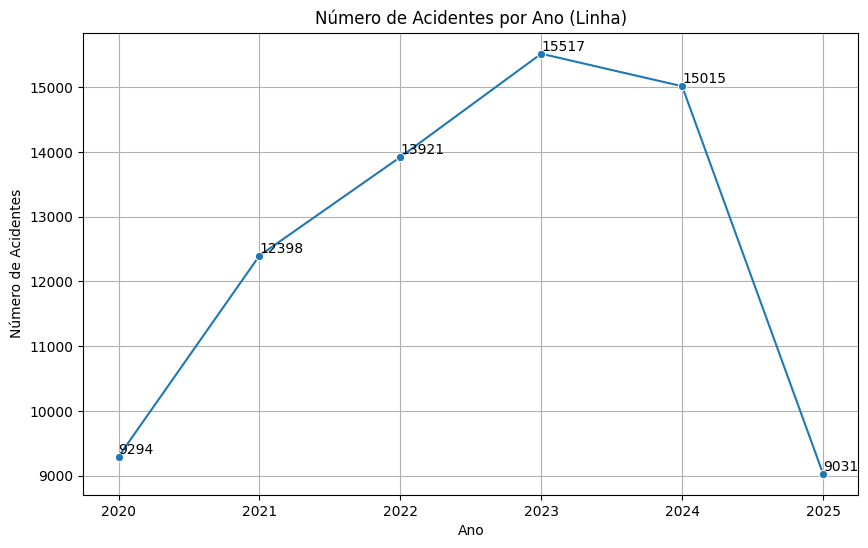

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['data'] = pd.to_datetime(df['data'], errors='coerce')
df_ano = df['data'].dt.year.value_counts().sort_index() # Sort by index (year) for line plot

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=df_ano.index, y=df_ano.values, marker='o') # Assign the plot to an axes object
plt.title('Número de Acidentes por Ano (Linha)')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.xticks(df_ano.index) # Ensure all years are shown on x-axis
plt.grid(True)

# Add text labels to each data point
for x, y in zip(df_ano.index, df_ano.values):
    plt.text(x, y, f'{y}', ha='left', va='bottom')

plt.show()

#**Tipos de acidentes**

> Essa visualização demonstra os tipos de acidentes que ocorreram

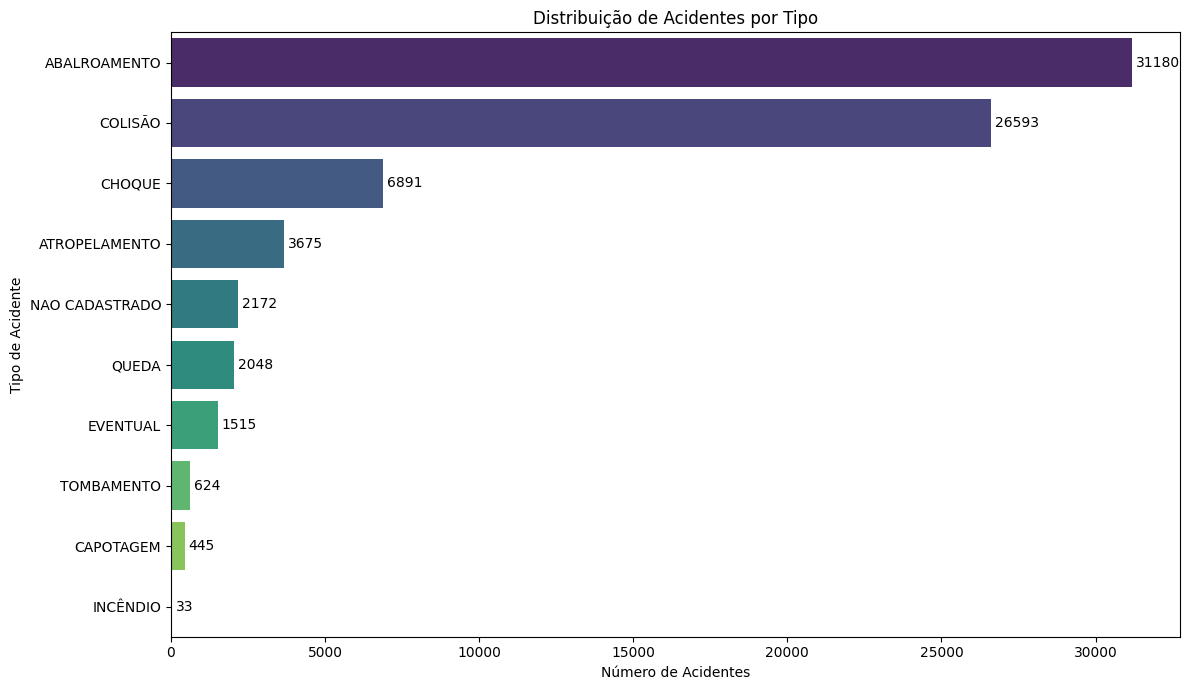

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

df_tipo_acid = df['tipo_acid'].value_counts()
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=df_tipo_acid.values, y=df_tipo_acid.index, palette='viridis', hue=df_tipo_acid.index, legend=False) # Switched x and y for horizontal bars, added hue and legend=False
plt.title('Distribuição de Acidentes por Tipo')
plt.xlabel('Número de Acidentes') # Switched label
plt.ylabel('Tipo de Acidente') # Switched label
plt.tight_layout()

# Adicionar rótulos de valores em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.show()

# **Tipos de veículos que mais causam acidentes**

> Essa visualização demonstra quais tipos de veículos mais costumam se envolver em acidentes

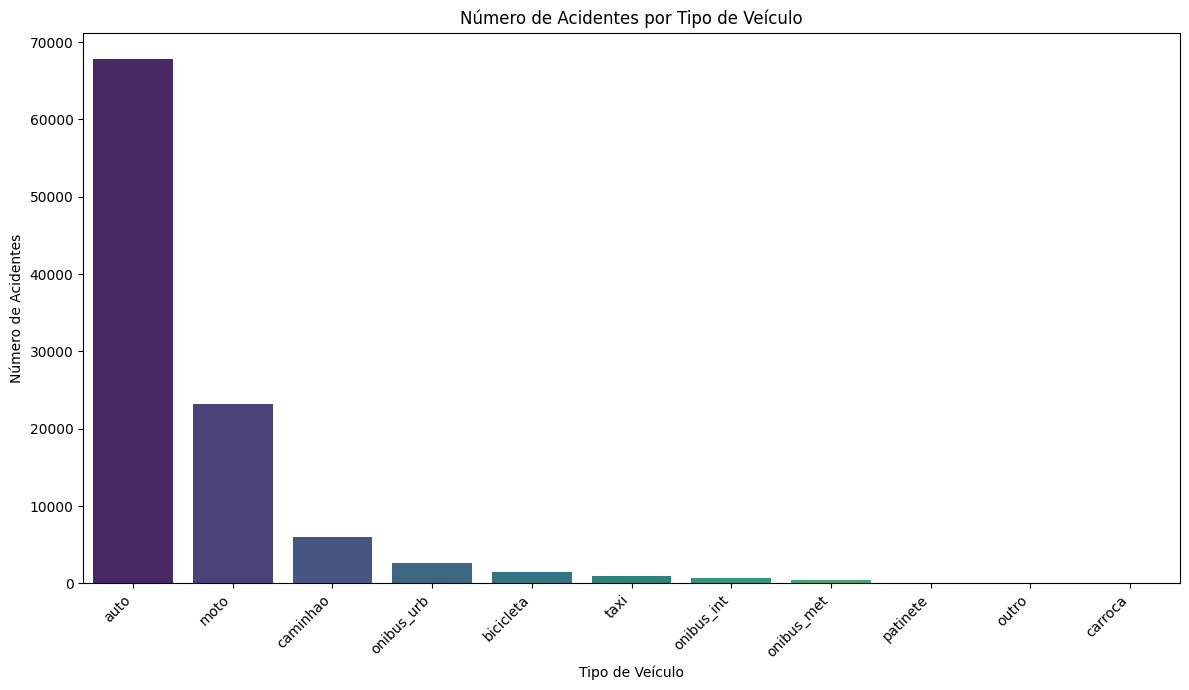

Número de acidentes por tipo de veículo (onde o veículo esteve envolvido):
auto          67796
moto          23233
caminhao       6021
onibus_urb     2625
bicicleta      1497
taxi            985
onibus_int      671
onibus_met      418
patinete         48
outro            44
carroca          20
dtype: int64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# List of vehicle columns
vehicle_cols = [
    'auto', 'taxi', 'onibus_urb', 'onibus_met', 'onibus_int',
    'caminhao', 'moto', 'carroca', 'bicicleta', 'patinete', 'outro'
]

# Calculate the number of accidents for each vehicle type where the value is > 0
accident_counts_by_vehicle = {}
for col in vehicle_cols:
    if col in df.columns:
        accident_counts_by_vehicle[col] = df[df[col] > 0].shape[0]
    else:
        print(f"Coluna '{col}' não encontrada no DataFrame.")

# Convert the results to a pandas Series for easier plotting
accident_counts_series = pd.Series(accident_counts_by_vehicle)

# Sort the series for better visualization (optional, but often helpful)
accident_counts_series = accident_counts_series.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=accident_counts_series.index, y=accident_counts_series.values, palette='viridis', hue=accident_counts_series.index, legend=False)
plt.title('Número de Acidentes por Tipo de Veículo')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

# Display the counts as well
print("Número de acidentes por tipo de veículo (onde o veículo esteve envolvido):")
print(accident_counts_series)



# **Análise por dia da semana**

> Essa visualização demonstra o número de acidentes por dia da semana


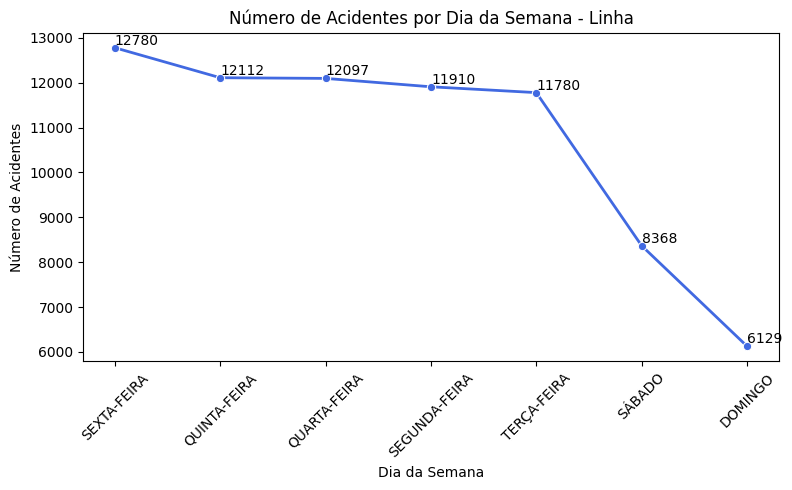

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each day of the week
df_dia_sem = df['dia_sem'].value_counts()

# Create a line plot
plt.figure(figsize=(8, 5))
ax = sns.lineplot(x=df_dia_sem.index, y=df_dia_sem.values, marker="o", linewidth=2, color="royalblue") # Assign to ax for annotations
plt.title("Número de Acidentes por Dia da Semana - Linha")
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Acidentes")
plt.xticks(rotation=45)
plt.tight_layout()

# Add text labels to each data point
for x, y in zip(df_dia_sem.index, df_dia_sem.values):
    plt.text(x, y, f'{y}', ha='left', va='bottom')

plt.show()

# **Acidentes com féridos**

> Essa visualização demonstra em quantos acidentes houveram ou não feridos

/tmp/ipython-input-2530395601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_vit.index, y=cont_vit.values, palette=['blue', 'red']) # Set colors to blue for 0 (Não) and red for 1 (Sim)


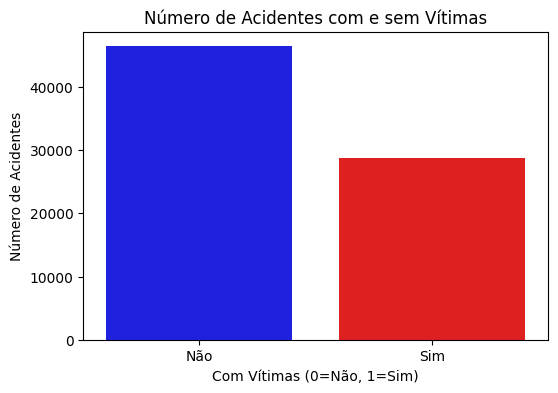

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

cont_vit = df['cont_vit'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=cont_vit.index, y=cont_vit.values, palette=['blue', 'red']) # Set colors to blue for 0 (Não) and red for 1 (Sim)
plt.title('Número de Acidentes com e sem Vítimas')
plt.xlabel('Com Vítimas (0=Não, 1=Sim)')
plt.ylabel('Número de Acidentes')
plt.xticks([0, 1], ['Não', 'Sim']) # Label the x-axis ticks
plt.show()

# **Gravidade**

> Essa visualização demonstra uma visualização por nível de gravidade do acidente

/tmp/ipython-input-4278339932.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


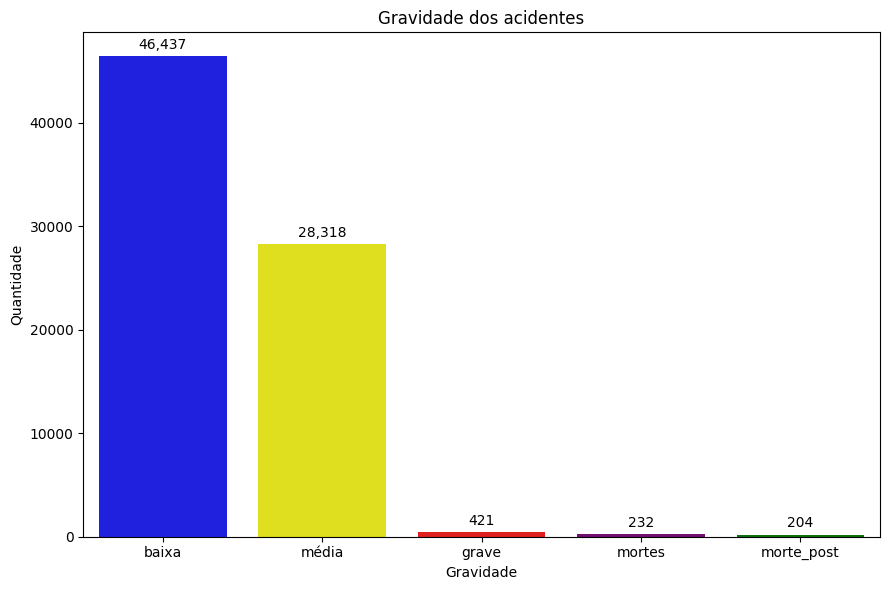

In [67]:
mortes_com_valor = df[df['mortes'] > 0]['mortes'].sum()
morte_post_com_valor = df[df['morte_post'] > 0]['morte_post'].sum()

# --- Classificação por gravidade ---
df['gravidade'] = np.select(
    [df['ups'] < 5, df['ups'] < 11, df['ups'] >= 11],
    ['baixa', 'média', 'grave'],
    default='desconhecida'
)

# Contagem de gravidade na ordem desejada
gravidade_counts = df['gravidade'].value_counts()
gravidade_counts = gravidade_counts.reindex(['baixa', 'média', 'grave'])

# Adicionar "mortes" e "morte_post" como categorias extras
extra_counts = pd.Series(
    {"mortes": mortes_com_valor, "morte_post": morte_post_com_valor}
)

# Juntar tudo em um só dataset
dados_plot = pd.concat([gravidade_counts, extra_counts])

# Paleta personalizada
custom_palette = {
    'baixa': 'blue',
    'média': 'yellow',
    'grave': 'red',
    'mortes': 'purple',
    'morte_post': 'green'
}

# --- Plot ---
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    x=dados_plot.index,
    y=dados_plot.values,
    palette=custom_palette
)

# Rótulos em cima das barras (inteiros sem .0, com separador de milhar)
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v):,}" for v in container.datavalues], padding=3)

plt.title('Gravidade dos acidentes')
plt.xlabel('Gravidade')
plt.ylabel('Quantidade')

plt.tight_layout()
plt.show()


## **Horário dos acidentes**

> Essa análise mostra a distribuição de acidentes por período do dia (hora)

/tmp/ipython-input-2109913706.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora_dt'] = pd.to_datetime(df['hora'], errors='coerce').dt.time


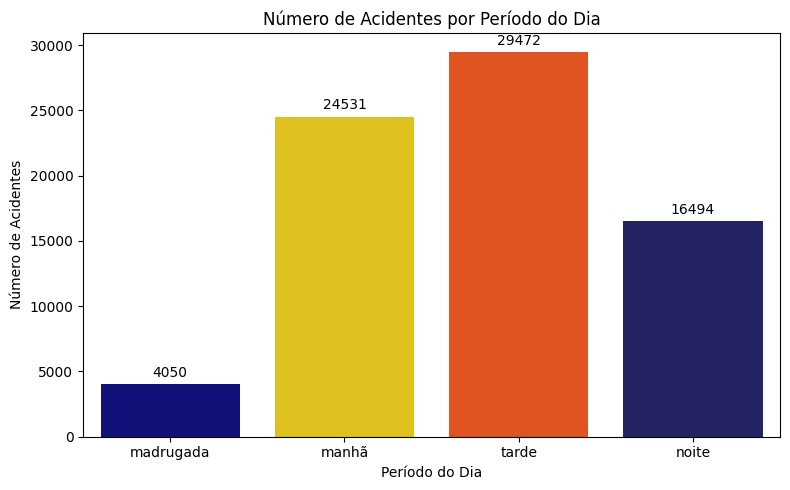

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
import pandas as pd

# Convert 'hora' to datetime objects, handling potential errors
df['hora_dt'] = pd.to_datetime(df['hora'], errors='coerce').dt.time

# Filter out rows where 'hora_dt' is NaT and create an explicit copy
df_filtered_time = df.dropna(subset=['hora_dt']).copy()

# Define the time bins and labels
time_bins = ['00:00:00', '06:00:00', '12:00:01', '18:00:01', '23:59:59']
time_labels = ['madrugada', 'manhã', 'tarde', 'noite']

# Convert time strings to datetime.time objects for comparison
time_bins_dt = [time.fromisoformat(ts) for ts in time_bins]

# Categorize the time on the filtered DataFrame
df_filtered_time['periodo_dia'] = pd.cut(
    df_filtered_time['hora_dt'],
    bins=time_bins_dt,
    labels=time_labels,
    include_lowest=True,
    ordered=False # Set to False as the time periods are not strictly ordered
)

# Handle the wrap-around for 'madrugada' from 00:00 to 05:59 on the filtered DataFrame
madrugada_early = (df_filtered_time['hora_dt'] >= time.fromisoformat('00:00:00')) & (df_filtered_time['hora_dt'] < time.fromisoformat('06:00:00'))
df_filtered_time.loc[madrugada_early, 'periodo_dia'] = 'madrugada'

# Get the value counts for the new column on the filtered DataFrame
periodo_counts = df_filtered_time['periodo_dia'].value_counts()

# Define a custom palette for the time periods
# You can adjust these colors as you prefer
custom_time_palette = {
    'madrugada': 'darkblue',
    'manhã': 'gold',
    'tarde': 'orangered',
    'noite': 'midnightblue'
}

# Create a vertical bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=periodo_counts.index, y=periodo_counts.values, palette=custom_time_palette, hue=periodo_counts.index, legend=False) # Added hue and legend=False
plt.title('Número de Acidentes por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Número de Acidentes')
plt.tight_layout()

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.show()

# **Ruas mais críticas**

> Essa visualização demonstra quais as ruas tem maior histórico de acidentes

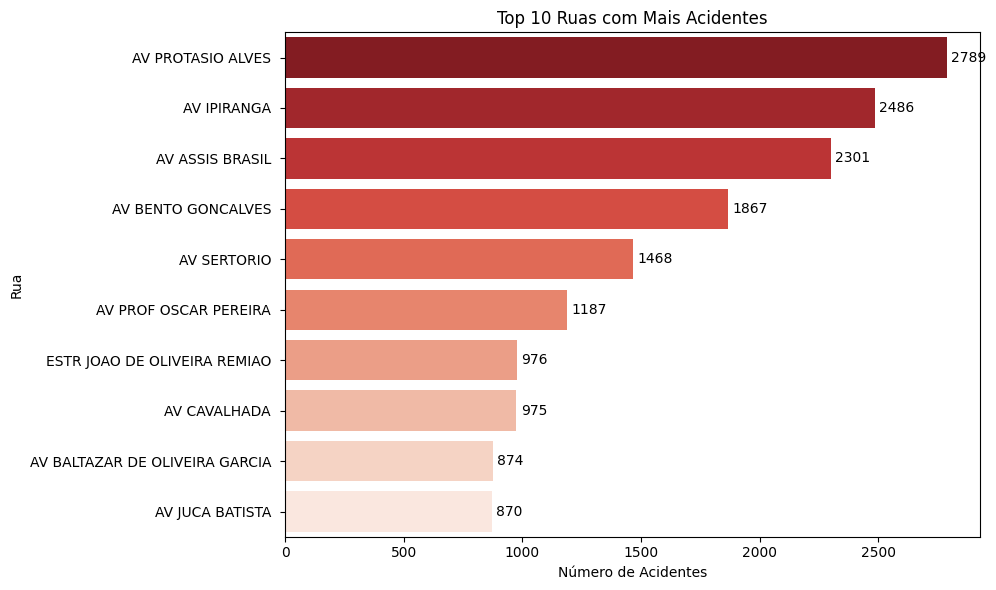

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 streets
top_10_streets = log1.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_streets.values, y=top_10_streets.index, palette='Reds_r', hue=top_10_streets.index, legend=False) # Switched x and y for horizontal bars, added hue and legend=False, changed palette to Reds_r
plt.title('Top 10 Ruas com Mais Acidentes')
plt.xlabel('Número de Acidentes') # Switched label
plt.ylabel('Rua') # Switched label
plt.tight_layout()

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3) # Adjust padding as needed

plt.show()

# **🔮 1. Previsão de Severidade de Acidente**

1️⃣ Definição do Problema

Objetivo: prever a severidade do acidente (ups) a partir das características do acidente.

Tipo de problema: regressão (UPS é um valor numérico que indica gravidade)

Features:

- hora
- dia_sem
- noite_dia
- regiao
- tipo_acid
- auto
- taxi
- lotacao
- onibus_urb
- onibus_met
- onibus_int
- caminhao
- moto
- carroca
- bicicleta
- outro
- patinete
- queda_arr
- cont_vit
- longitude
- latitude

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



--- Métricas de Classificação (Logistic Regression) ---
Acurácia: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

        leve       1.00      1.00      1.00      7975
       medio       1.00      1.00      1.00      4746
       grave       0.00      0.00      0.00         0

    accuracy                           1.00     12721
   macro avg       0.67      0.67      0.67     12721
weighted avg       1.00      1.00      1.00     12721


Coeficientes para a classe 'leve':
hora: 0.0000
auto: -0.0886
taxi: -0.0256
lotacao: -0.0047
onibus_urb: 0.0128
onibus_met: 0.0073
onibus_int: -0.0042
caminhao: -0.0567
moto: 0.2493
carroca: 0.0052
bicicleta: 0.0918
outro: -0.0046
patinete: 0.0134
longitude: 0.0438
latitude: 0.0392
queda_arr: 0.0084
cont_vit: 4.1607
dia_sem_DOMINGO: -0.0236
dia_sem_QUARTA-FEIRA: -0.0931
dia_sem_QUINTA-FEIRA: -0.0965
dia_sem_SEGUNDA-FEIRA: -0.0830
dia_sem_SEXTA-FEIRA: -0.0867
dia_sem_SÁBADO: -0.0291
dia_sem_TERÇA-FEIRA: -0.0831
no

IndexError: index 1 is out of bounds for axis 0 with size 1